# Thresholds for "random" in fingerprints the RDKit supports

This is an updated version of a post. The original version of the notebook can be [found in github](https://github.com/greglandrum/rdkit_blog/blob/936b35b77ddca3e843991d1c4b1e3532e754b734/notebooks/Fingerprint%20Thresholds.ipynb).

A frequent question that comes up when considering fingerprint similarity is: "What threshold should I use to determine what a neighbor is?" The answer is poorly defined. Of course it depends heavily on the details of the fingerprint, but there's also a very subjective component: you want to pick a low enough threshold that you're sure you won't miss anything, but you don't want to pick up too much noise.

The goal here is to systematically come up with some guidelines that can be used for fingerprints supported within the RDKit. We will do that by looking a similarities between random "drug-like" (MW<600) molecules picked from ChEMBL.

For the analysis, the 25K similarity values are sorted and the values at particular threshold are examined. 

There's a fair amount of code and results below, so here's the summary table. To help interpret this: 22500 of the 25000 pairs (90%) have a MACCS keys similarity value less than 0.528. 


<table>
<tr><th>Fingerprint</th><th>Metric</th><th>70% level</th><th>80% level</th><th>90% level</th><th>95% level</th><th>99% level</th></tr>
<tr><td>MACCS</td><td>Tanimoto</td>
  <td>0.431</td>
  <td>0.471</td>
  <td>0.528</td>
  <td>0.575</td>
  <td>0.655</td>
</tr><tr><td>Morgan0 (counts)</td><td>Tanimoto</td>
  <td>0.429</td>
  <td>0.471</td>
  <td>0.525</td>
  <td>0.568</td>
  <td>0.651</td>
</tr><tr><td>Morgan1 (counts)</td><td>Tanimoto</td>
  <td>0.265</td>
  <td>0.293</td>
  <td>0.333</td>
  <td>0.364</td>
  <td>0.429</td>
</tr><tr><td>Morgan2 (counts)</td><td>Tanimoto</td>
  <td>0.181</td>
  <td>0.201</td>
  <td>0.229</td>
  <td>0.252</td>
  <td>0.305</td>
</tr><tr><td>Morgan3 (counts)</td><td>Tanimoto</td>
  <td>0.141</td>
  <td>0.156</td>
  <td>0.178</td>
  <td>0.196</td>
  <td>0.238</td>
</tr><tr><td>Morgan0 (bits)</td><td>Tanimoto</td>
  <td>0.435</td>
  <td>0.475</td>
  <td>0.529</td>
  <td>0.571</td>
  <td>0.656</td>
</tr><tr><td>Morgan1 (bits)</td><td>Tanimoto</td>
  <td>0.273</td>
  <td>0.301</td>
  <td>0.341</td>
  <td>0.371</td>
  <td>0.434</td>
</tr><tr><td>Morgan2 (bits)</td><td>Tanimoto</td>
  <td>0.197</td>
  <td>0.217</td>
  <td>0.246</td>
  <td>0.269</td>
  <td>0.322</td>
</tr><tr><td>Morgan3 (bits)</td><td>Tanimoto</td>
  <td>0.165</td>
  <td>0.181</td>
  <td>0.203</td>
  <td>0.222</td>
  <td>0.264</td>
</tr><tr><td>FeatMorgan0 (counts)</td><td>Tanimoto</td>
  <td>0.583</td>
  <td>0.630</td>
  <td>0.690</td>
  <td>0.737</td>
  <td>0.818</td>
</tr><tr><td>FeatMorgan1 (counts)</td><td>Tanimoto</td>
  <td>0.390</td>
  <td>0.425</td>
  <td>0.474</td>
  <td>0.511</td>
  <td>0.581</td>
</tr><tr><td>FeatMorgan2 (counts)</td><td>Tanimoto</td>
  <td>0.272</td>
  <td>0.298</td>
  <td>0.333</td>
  <td>0.364</td>
  <td>0.424</td>
</tr><tr><td>FeatMorgan3 (counts)</td><td>Tanimoto</td>
  <td>0.209</td>
  <td>0.228</td>
  <td>0.256</td>
  <td>0.279</td>
  <td>0.328</td>
</tr><tr><td>FeatMorgan0 (bits)</td><td>Tanimoto</td>
  <td>0.583</td>
  <td>0.630</td>
  <td>0.690</td>
  <td>0.737</td>
  <td>0.818</td>
</tr><tr><td>FeatMorgan1 (bits)</td><td>Tanimoto</td>
  <td>0.395</td>
  <td>0.429</td>
  <td>0.477</td>
  <td>0.514</td>
  <td>0.585</td>
</tr><tr><td>FeatMorgan2 (bits)</td><td>Tanimoto</td>
  <td>0.284</td>
  <td>0.310</td>
  <td>0.347</td>
  <td>0.376</td>
  <td>0.434</td>
</tr><tr><td>FeatMorgan3 (bits)</td><td>Tanimoto</td>
  <td>0.228</td>
  <td>0.248</td>
  <td>0.276</td>
  <td>0.299</td>
  <td>0.349</td>
</tr><tr><td>RDKit 4 (bits)</td><td>Tanimoto</td>
  <td>0.209</td>
  <td>0.239</td>
  <td>0.285</td>
  <td>0.325</td>
  <td>0.426</td>
</tr><tr><td>RDKit 5 (bits)</td><td>Tanimoto</td>
  <td>0.197</td>
  <td>0.219</td>
  <td>0.253</td>
  <td>0.287</td>
  <td>0.368</td>
</tr><tr><td>RDKit 6 (bits)</td><td>Tanimoto</td>
  <td>0.230</td>
  <td>0.250</td>
  <td>0.280</td>
  <td>0.308</td>
  <td>0.369</td>
</tr><tr><td>RDKit 7 (bits)</td><td>Tanimoto</td>
  <td>0.313</td>
  <td>0.346</td>
  <td>0.389</td>
  <td>0.429</td>
  <td>0.507</td>
</tr><tr><td>linear RDKit 4 (bits)</td><td>Tanimoto</td>
  <td>0.225</td>
  <td>0.258</td>
  <td>0.309</td>
  <td>0.354</td>
  <td>0.462</td>
</tr><tr><td>linear RDKit 5 (bits)</td><td>Tanimoto</td>
  <td>0.198</td>
  <td>0.225</td>
  <td>0.269</td>
  <td>0.309</td>
  <td>0.404</td>
</tr><tr><td>linear RDKit 6 (bits)</td><td>Tanimoto</td>
  <td>0.187</td>
  <td>0.210</td>
  <td>0.246</td>
  <td>0.282</td>
  <td>0.365</td>
</tr><tr><td>linear RDKit 7 (bits)</td><td>Tanimoto</td>
  <td>0.182</td>
  <td>0.203</td>
  <td>0.234</td>
  <td>0.264</td>
  <td>0.337</td>
</tr><tr><td>Atom Pairs (counts)</td><td>Tanimoto</td>
  <td>0.180</td>
  <td>0.204</td>
  <td>0.237</td>
  <td>0.265</td>
  <td>0.325</td>
</tr><tr><td>Torsions (counts)</td><td>Tanimoto</td>
  <td>0.107</td>
  <td>0.130</td>
  <td>0.165</td>
  <td>0.194</td>
  <td>0.266</td>
</tr><tr><td>Atom Pairs (bits)</td><td>Tanimoto</td>
  <td>0.275</td>
  <td>0.301</td>
  <td>0.335</td>
  <td>0.363</td>
  <td>0.415</td>
</tr><tr><td>Torsions (bits)</td><td>Tanimoto</td>
  <td>0.133</td>
  <td>0.155</td>
  <td>0.188</td>
  <td>0.219</td>
  <td>0.288</td>
</tr><tr><td>Avalon 512 (bits)</td><td>Tanimoto</td>
  <td>0.369</td>
  <td>0.407</td>
  <td>0.461</td>
  <td>0.505</td>
  <td>0.575</td>
</tr><tr><td>Avalon 1024 (bits)</td><td>Tanimoto</td>
  <td>0.269</td>
  <td>0.297</td>
  <td>0.340</td>
  <td>0.375</td>
  <td>0.449</td>
</tr><tr><td>Avalon 512 (counts)</td><td>Tanimoto</td>
  <td>0.300</td>
  <td>0.333</td>
  <td>0.379</td>
  <td>0.418</td>
  <td>0.491</td>
</tr><tr><td>Avalon 1024 (counts)</td><td>Tanimoto</td>
  <td>0.267</td>
  <td>0.299</td>
  <td>0.344</td>
  <td>0.384</td>
  <td>0.462</td>
</tr>
</table>


In [1]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit import rdBase
from rdkit import DataStructs
from collections import defaultdict
import pickle,random,gzip
print(rdBase.rdkitVersion)
import time
print(time.asctime())
%pylab inline

2021.03.1
Fri May 21 05:05:20 2021
Populating the interactive namespace from numpy and matplotlib


/home/glandrum/miniconda3/envs/rdkit_blog/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Read in the data

We're using the set of 25K reference pairs generated in an earlier post: http://rdkit.blogspot.ch/2013/10/building-similarity-comparison-set-goal.html

As a quick reminder: these are pairs of molecules taken from ChEMBL with MW<600 and a count-based MFP0 similarity of at least 0.7 to each other.

In [2]:
ind = [x.split() for x in gzip.open('../data/chembl16_25K.pairs.txt.gz')]
ms1 = []
ms2 = []
for i,row in enumerate(ind):
    m1 = Chem.MolFromSmiles(row[1])
    ms1.append((row[0],m1))
    m2 = Chem.MolFromSmiles(row[3])
    ms2.append((row[2],m2))
    


Those pairs are related to each other, but we want random pairs, so shuffle the second list:

In [3]:
random.seed(23)
random.shuffle(ms2)

In [4]:
try:
    import ipyparallel as ipp
    rc = ipp.Client()
    dview = rc[:]
    dview.execute('from rdkit import Chem')
    dview.execute('from rdkit import Descriptors')
    dview.execute('from rdkit.Chem import rdMolDescriptors')
    dview.execute('from rdkit.Avalon import pyAvalonTools')
except:
    print("could not use ipyparallel")
    dview = None

results_accum = dict()
def compareFPs(ms1,ms2,fpfn,fpName):
    if dview is not None:
        fps = dview.map_sync(lambda x:fpfn(x[1]),ms1)
        fp2s = dview.map_sync(lambda x:fpfn(x[1]),ms2)
    else:
        fps = [fpfn(x[1]) for x in ms1]
        fp2s = [fpfn(x[1]) for x in ms2]
    sims = [DataStructs.TanimotoSimilarity(x,y) for x,y in zip(fps,fp2s)]
    sl = sorted(sims)
    np = len(sl)
    with open('fp_results.txt','a+') as outf:
        outf.write(f'<tr><td>{fpName}</td><td>Tanimoto</td>\n')
        accum = {}
        for bin in (.7,.8,.9,.95,.99):
            simv = sl[int(bin*np)]
            print( bin,simv)
            outf.write(f'  <td>{simv:.3f}</td>\n')
            accum[bin] = simv
        outf.write('</tr>')
        results_accum[fpName] = accum
    hist(sims,bins=20)
    xlabel(fpName)
    

# MACCS

0.7 0.4305555555555556
0.8 0.47058823529411764
0.9 0.5283018867924528
0.95 0.575
0.99 0.6551724137931034


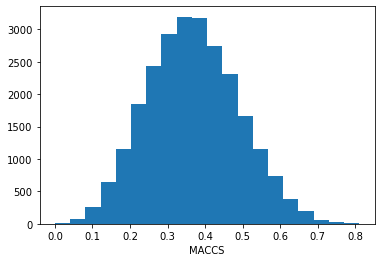

In [5]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetMACCSKeysFingerprint(x),"MACCS")


# Morgan FPs

## count based

0.7 0.42857142857142855
0.8 0.47058823529411764
0.9 0.525
0.95 0.5675675675675675
0.99 0.6511627906976745


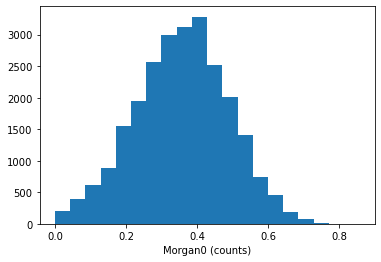

In [6]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetMorganFingerprint(x,0),"Morgan0 (counts)")


0.7 0.2653061224489796
0.8 0.2926829268292683
0.9 0.3333333333333333
0.95 0.36363636363636365
0.99 0.42857142857142855


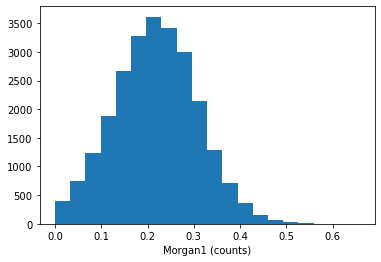

In [7]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetMorganFingerprint(x,1),"Morgan1 (counts)")

0.7 0.18110236220472442
0.8 0.20125786163522014
0.9 0.22916666666666666
0.95 0.2523364485981308
0.99 0.304635761589404


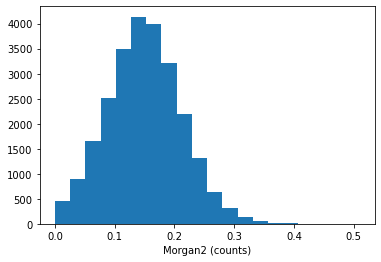

In [8]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetMorganFingerprint(x,2),"Morgan2 (counts)")

0.7 0.140625
0.8 0.1557377049180328
0.9 0.17751479289940827
0.95 0.19607843137254902
0.99 0.23841059602649006


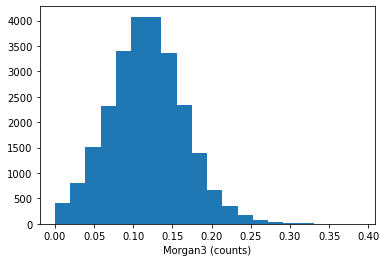

In [9]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetMorganFingerprint(x,3),"Morgan3 (counts)")

## bit-vector based

0.7 0.43478260869565216
0.8 0.475
0.9 0.5294117647058824
0.95 0.5714285714285714
0.99 0.65625


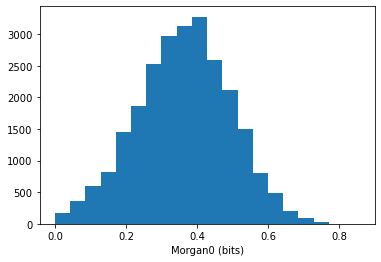

In [10]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetHashedMorganFingerprint(x,0,1024),"Morgan0 (bits)")


0.7 0.2727272727272727
0.8 0.30120481927710846
0.9 0.34065934065934067
0.95 0.37142857142857144
0.99 0.4342105263157895


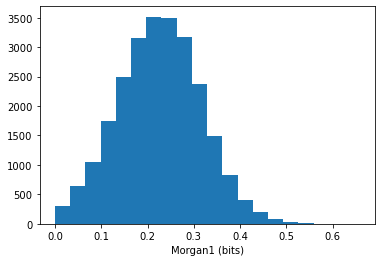

In [11]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetHashedMorganFingerprint(x,1,1024),"Morgan1 (bits)")


0.7 0.19708029197080293
0.8 0.2169811320754717
0.9 0.24603174603174602
0.95 0.2689655172413793
0.99 0.3217391304347826


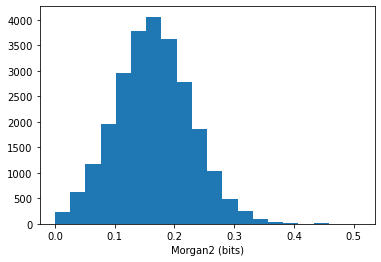

In [12]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetHashedMorganFingerprint(x,2,1024),"Morgan2 (bits)")


0.7 0.16477272727272727
0.8 0.18072289156626506
0.9 0.20261437908496732
0.95 0.2222222222222222
0.99 0.26356589147286824


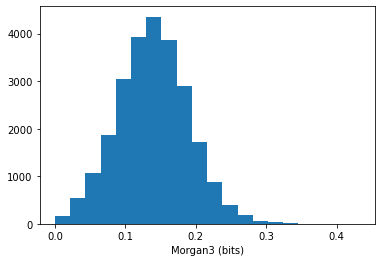

In [13]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetHashedMorganFingerprint(x,3,1024),"Morgan3 (bits)")


# FeatMorgan

## count based

0.7 0.5833333333333334
0.8 0.6296296296296297
0.9 0.6896551724137931
0.95 0.7368421052631579
0.99 0.8181818181818182


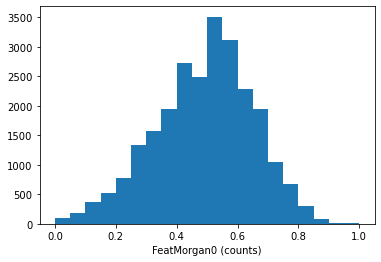

In [14]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetMorganFingerprint(x,0,useFeatures=True),"FeatMorgan0 (counts)")


0.7 0.3902439024390244
0.8 0.42528735632183906
0.9 0.47368421052631576
0.95 0.5106382978723404
0.99 0.5813953488372093


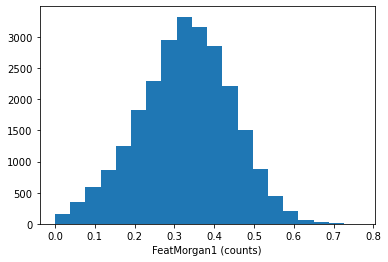

In [15]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetMorganFingerprint(x,1,useFeatures=True),"FeatMorgan1 (counts)")


0.7 0.272
0.8 0.29770992366412213
0.9 0.3333333333333333
0.95 0.36363636363636365
0.99 0.424


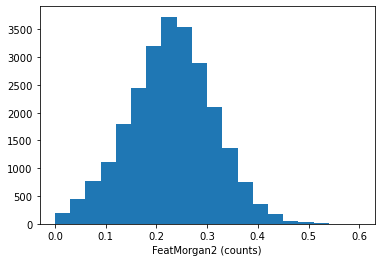

In [16]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetMorganFingerprint(x,2,useFeatures=True),"FeatMorgan2 (counts)")


0.7 0.2087378640776699
0.8 0.22818791946308725
0.9 0.2558139534883721
0.95 0.2785714285714286
0.99 0.3275862068965517


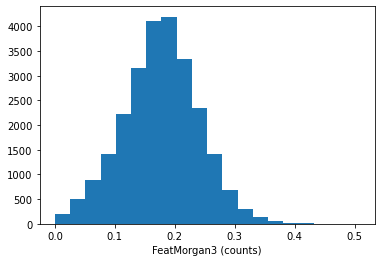

In [17]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetMorganFingerprint(x,3,useFeatures=True),"FeatMorgan3 (counts)")


## bit vectors

0.7 0.5833333333333334
0.8 0.6296296296296297
0.9 0.6896551724137931
0.95 0.7368421052631579
0.99 0.8181818181818182


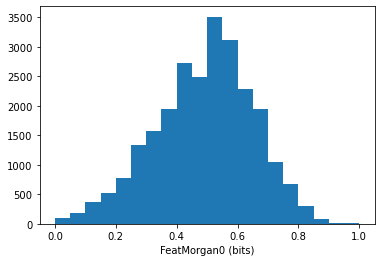

In [18]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetHashedMorganFingerprint(x,0,1024,useFeatures=True),"FeatMorgan0 (bits)")


0.7 0.39473684210526316
0.8 0.42857142857142855
0.9 0.4772727272727273
0.95 0.5142857142857142
0.99 0.5849056603773585


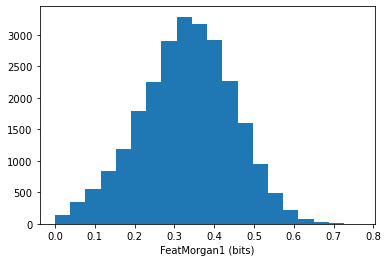

In [19]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetHashedMorganFingerprint(x,1,1024,useFeatures=True),"FeatMorgan1 (bits)")


0.7 0.28368794326241137
0.8 0.30973451327433627
0.9 0.3469387755102041
0.95 0.37606837606837606
0.99 0.43434343434343436


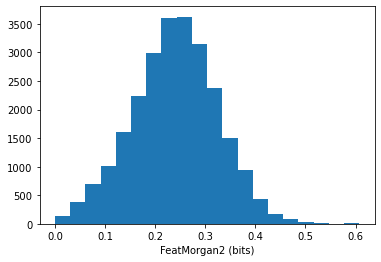

In [20]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetHashedMorganFingerprint(x,2,1024,useFeatures=True),"FeatMorgan2 (bits)")


0.7 0.22807017543859648
0.8 0.24770642201834864
0.9 0.27564102564102566
0.95 0.29901960784313725
0.99 0.3488372093023256


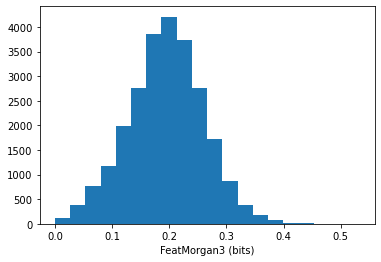

In [21]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetHashedMorganFingerprint(x,3,1024,useFeatures=True),"FeatMorgan3 (bits)")


# RDKit

## Branched (default)

0.7 0.2094017094017094
0.8 0.23863636363636365
0.9 0.2849462365591398
0.95 0.3254237288135593
0.99 0.4258373205741627


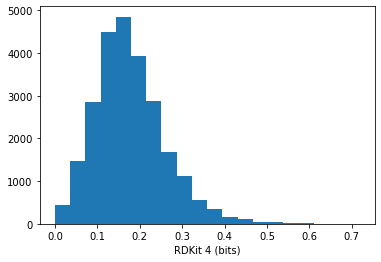

In [22]:
compareFPs(ms1,ms2,lambda x:Chem.RDKFingerprint(x,maxPath=4),"RDKit 4 (bits)")


0.7 0.19672131147540983
0.8 0.21875
0.9 0.2534562211981567
0.95 0.28735632183908044
0.99 0.3682170542635659


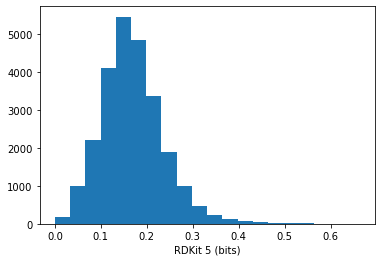

In [23]:
compareFPs(ms1,ms2,lambda x:Chem.RDKFingerprint(x,maxPath=5),"RDKit 5 (bits)")


0.7 0.22965641952983726
0.8 0.2502120441051739
0.9 0.28023598820059
0.95 0.30818767249310025
0.99 0.3686382393397524


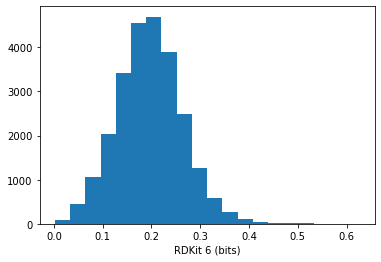

In [24]:
compareFPs(ms1,ms2,lambda x:Chem.RDKFingerprint(x,maxPath=6),"RDKit 6 (bits)")


0.7 0.3130372492836676
0.8 0.34558303886925795
0.9 0.38909541511771994
0.95 0.4286600496277916
0.99 0.5068903535050928


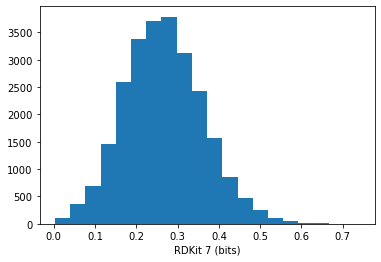

In [25]:
compareFPs(ms1,ms2,lambda x:Chem.RDKFingerprint(x,maxPath=7),"RDKit 7 (bits)")


## linear

0.7 0.22456140350877193
0.8 0.25773195876288657
0.9 0.30864197530864196
0.95 0.35403726708074534
0.99 0.46153846153846156


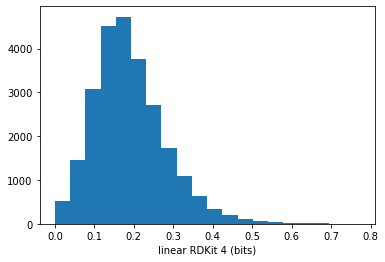

In [26]:
compareFPs(ms1,ms2,lambda x:Chem.RDKFingerprint(x,maxPath=4,branchedPaths=False),"linear RDKit 4 (bits)")


0.7 0.19756838905775076
0.8 0.22549019607843138
0.9 0.2687224669603524
0.95 0.3090909090909091
0.99 0.40425531914893614


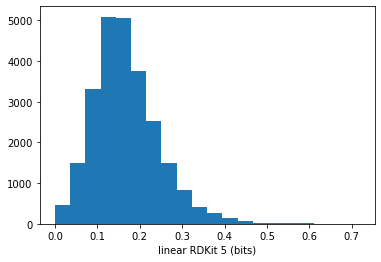

In [27]:
compareFPs(ms1,ms2,lambda x:Chem.RDKFingerprint(x,maxPath=5,branchedPaths=False),"linear RDKit 5 (bits)")


0.7 0.18657937806873978
0.8 0.21005917159763313
0.9 0.24612403100775193
0.95 0.2820069204152249
0.99 0.36476426799007444


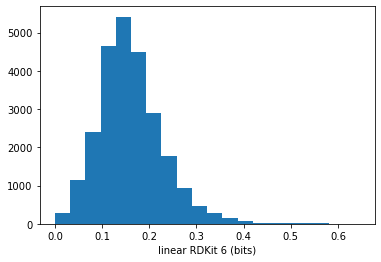

In [28]:
compareFPs(ms1,ms2,lambda x:Chem.RDKFingerprint(x,maxPath=6,branchedPaths=False),"linear RDKit 6 (bits)")


0.7 0.18204488778054864
0.8 0.20286085825747724
0.9 0.23367198838896952
0.95 0.2640625
0.99 0.33689024390243905


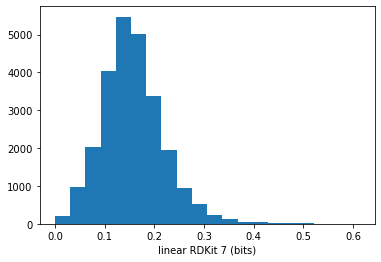

In [29]:
compareFPs(ms1,ms2,lambda x:Chem.RDKFingerprint(x,maxPath=7,branchedPaths=False),"linear RDKit 7 (bits)")


# Atom pairs and torsions

## count-based

0.7 0.17993630573248406
0.8 0.20386266094420602
0.9 0.23671497584541062
0.95 0.26545454545454544
0.99 0.32547169811320753


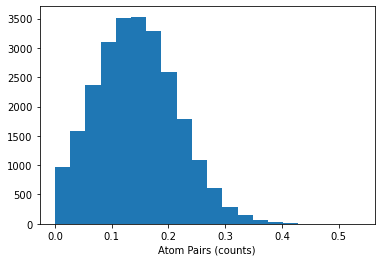

In [30]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetAtomPairFingerprint(x),"Atom Pairs (counts)")


0.7 0.10714285714285714
0.8 0.13
0.9 0.16470588235294117
0.95 0.19387755102040816
0.99 0.26582278481012656


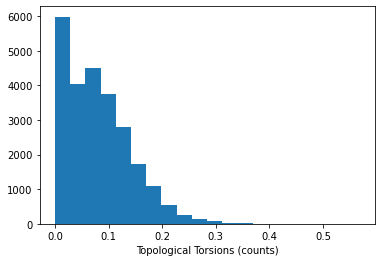

In [31]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetTopologicalTorsionFingerprint(x),"Topological Torsions (counts)")


## bit vectors

0.7 0.27488151658767773
0.8 0.3008298755186722
0.9 0.3353658536585366
0.95 0.36342042755344417
0.99 0.4146341463414634


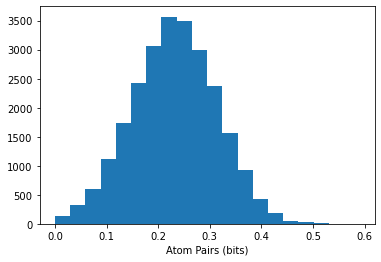

In [32]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(x),"Atom Pairs (bits)")


0.7 0.1326530612244898
0.8 0.1553398058252427
0.9 0.18840579710144928
0.95 0.2191780821917808
0.99 0.2876712328767123


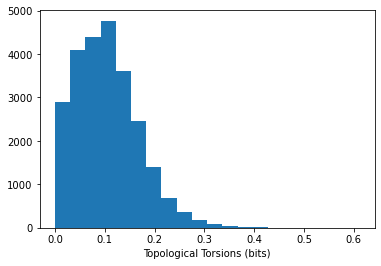

In [33]:
compareFPs(ms1,ms2,lambda x:rdMolDescriptors.GetHashedTopologicalTorsionFingerprintAsBitVect(x),"Topological Torsions (bits)")


# Avalon

0.7 0.3693379790940767
0.8 0.4074074074074074
0.9 0.46130952380952384
0.95 0.5054347826086957
0.99 0.5749318801089919


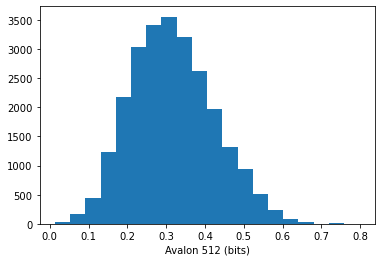

In [34]:
compareFPs(ms1,ms2,lambda x:pyAvalonTools.GetAvalonFP(x,512),"Avalon 512 (bits)")


0.7 0.26932668329177056
0.8 0.2972972972972973
0.9 0.3402061855670103
0.95 0.3747016706443914
0.99 0.4490909090909091


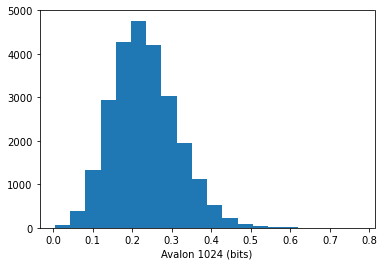

In [35]:
compareFPs(ms1,ms2,lambda x:pyAvalonTools.GetAvalonFP(x,1024),"Avalon 1024 (bits)")


# Avalon Counts

0.7 0.30028063610851263
0.8 0.332624867162593
0.9 0.3787951807228916
0.95 0.4175461741424802
0.99 0.491005291005291


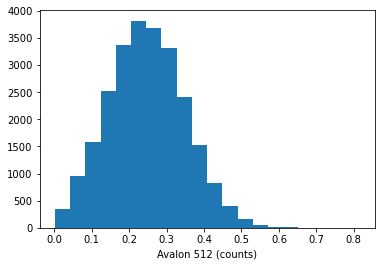

In [36]:
compareFPs(ms1,ms2,lambda x:pyAvalonTools.GetAvalonCountFP(x,512),"Avalon 512 (counts)")


0.7 0.26651162790697674
0.8 0.2988505747126437
0.9 0.34438775510204084
0.95 0.3844486589000271
0.99 0.4624173180998196


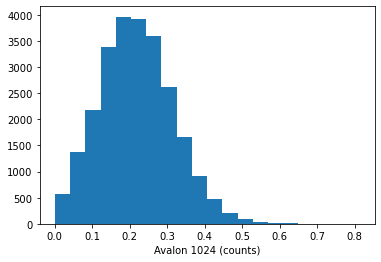

In [37]:
compareFPs(ms1,ms2,lambda x:pyAvalonTools.GetAvalonCountFP(x,1024),"Avalon 1024 (counts)")


In [38]:
pickle.dump(results_accum,open('./results/fp_thresholds_random_accum.pkl','wb+'))